### Libraries

In [10]:
import importlib
import os
import sys

sys.path.insert(0, '../src')
import dataset
from torch.utils.data import DataLoader

importlib.reload(dataset)
from dataset import RORDDataset

In [86]:
# move all the files to base folder

# img_dir = '/media/tiagociiic/easystore/RORD/train/img'
# gt_dir = '/media/tiagociiic/easystore/RORD/train/gt'
# mask_dir = '/media/tiagociiic/easystore/RORD/train/mask'
# 
# for root, dirs, files in os.walk(img_dir):
#     for file in files:
#         shutil.move(os.path.join(root, file), img_dir)
# 
# for root, dirs, files in os.walk(gt_dir):
#     for file in files:
#         shutil.move(os.path.join(root, file), gt_dir)
# 
# for root, dirs, files in os.walk(mask_dir):
#     for file in files:
#         shutil.move(os.path.join(root, file), mask_dir)

### RORDDataset Class

In [3]:
# Create a sample dataset
external_disk_path = "/media/tiagociiic/easystore"
split = 'train'
dataset_dir = os.path.join(external_disk_path, "RORD")
train_dir = os.path.join(dataset_dir, split)
print(f"Dataset directory: {dataset_dir}")

Dataset directory: /media/tiagociiic/easystore/RORD


In [11]:
# Create an instance of the RORDDataset class
dataset = RORDDataset(root_dir=dataset_dir, split='train', image_size=[512, 512])
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

2024-06-20 11:27:50.511 | INFO     | dataset:__init__:93 - Loading image, ground truth, and mask files...
2024-06-20 11:27:50.513 | INFO     | dataset:__init__:98 - Loading image files from: /media/tiagociiic/easystore/RORD/train/img, ground truth files from: /media/tiagociiic/easystore/RORD/train/gt, and mask files from: /media/tiagociiic/easystore/RORD/train/mask
2024-06-20 11:27:51.543 | INFO     | dataset:__init__:109 - Found 162204 image files
2024-06-20 11:27:51.544 | INFO     | dataset:__init__:110 - Found 412745 ground truth files
2024-06-20 11:27:51.544 | INFO     | dataset:__init__:111 - Found 161164 mask files
2024-06-20 11:27:51.737 | INFO     | dataset:__init__:132 - Found 162204 image files, 412745 ground truth files, and 161164 mask files
2024-06-20 11:27:52.338 | INFO     | dataset:__init__:139 - Found 161164 common files in the directories


Image 1 range: [0.00, 1.00], GT 1 range: [0.00, 1.00], Mask 1 range: [0.00, 1.00]
Image 2 range: [0.00, 1.00], GT 2 range: [0.05, 0.99], Mask 2 range: [0.00, 1.00]
Image 3 range: [0.00, 1.00], GT 3 range: [0.00, 0.95], Mask 3 range: [0.00, 1.00]
Image 4 range: [0.00, 1.00], GT 4 range: [0.00, 1.00], Mask 4 range: [0.00, 1.00]


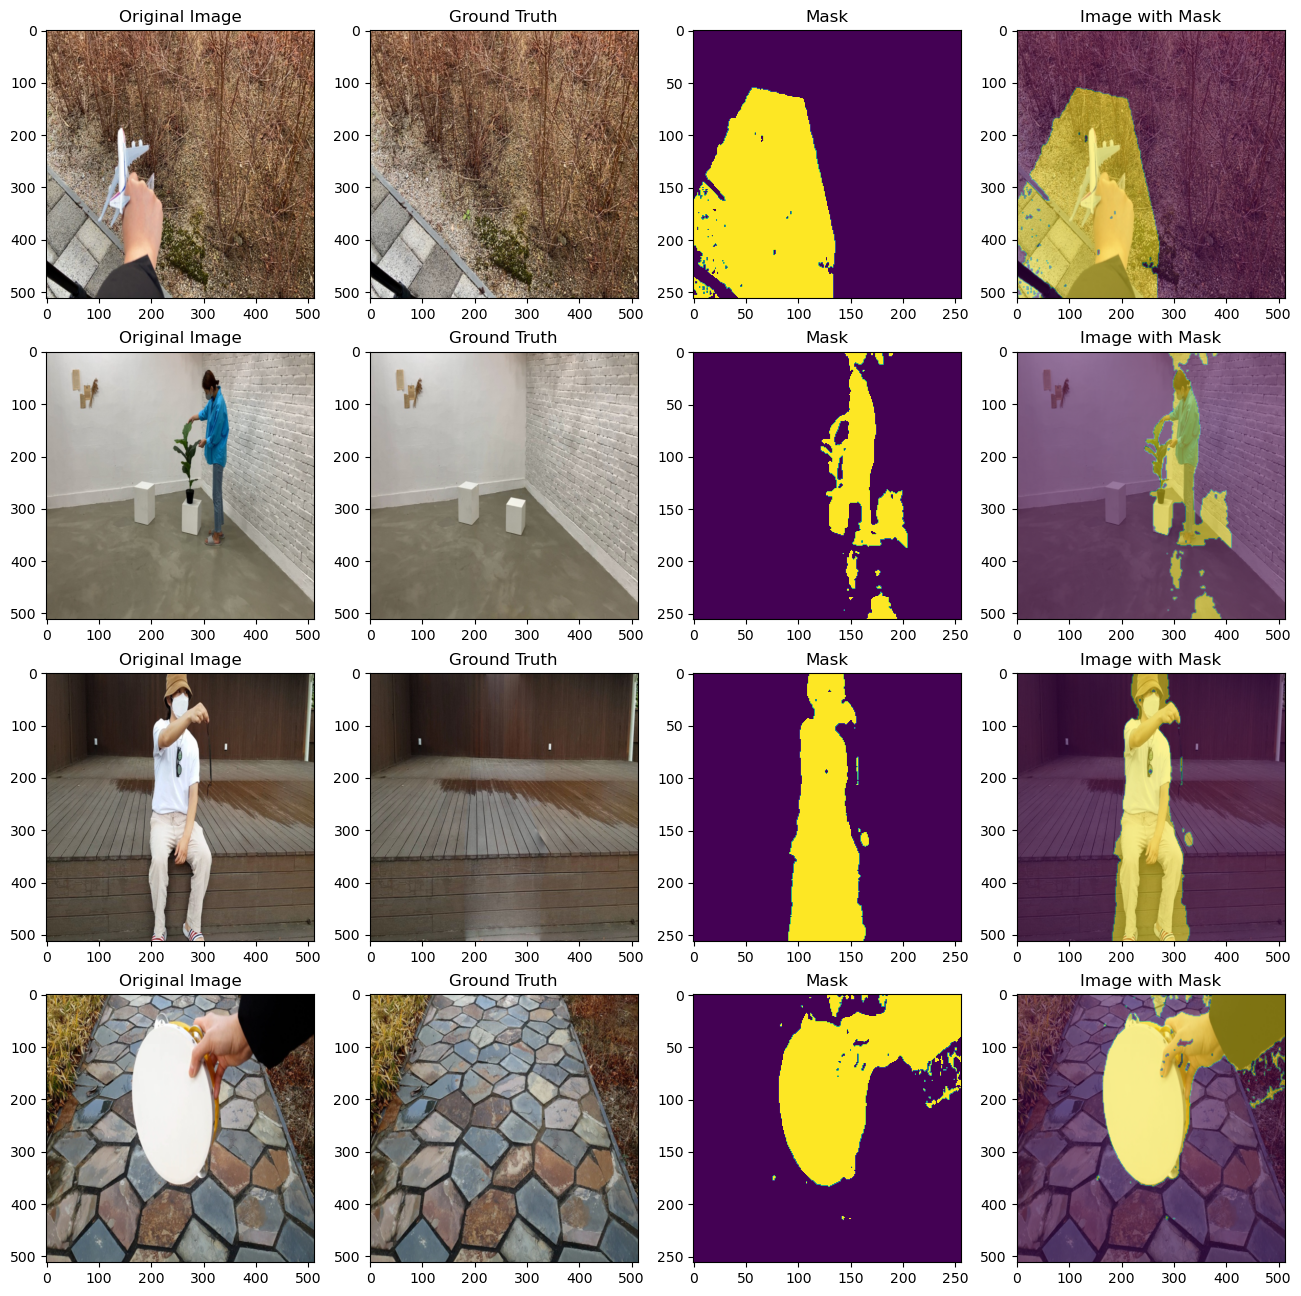

In [37]:
import random
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

n_samples = 4
indices = random.sample(range(len(dataset)), n_samples)

plt.figure(figsize=(16, 16))
for i, index in enumerate(indices):
    sample = dataset[index]

    image = np.array(sample['image']).transpose(1, 2, 0)
    gt = np.array(sample['gt']).transpose(1, 2, 0)
    mask = np.array(sample['mask']).transpose(1, 2, 0)

    print(
        f"Image {i + 1} range: [{image.min():.2f}, {image.max():.2f}], GT {i + 1} range: [{gt.min():.2f}, {gt.max():.2f}], Mask {i + 1} range: [{mask.min():.2f}, {mask.max():.2f}]")

    plt.subplot(4, 4, i * 4 + 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(4, 4, i * 4 + 2)
    plt.imshow(gt)
    plt.title("Ground Truth")

    plt.subplot(4, 4, i * 4 + 3)
    plt.imshow(mask)
    plt.title("Mask")

    plt.subplot(4, 4, i * 4 + 4)
    mask = resize(mask, (512, 512), anti_aliasing=True)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.title("Image with Mask")

plt.show()

In [ ]:
# TODO: improve masking algorithm
# TODO: train model in the 161164 images

In [ ]:
# test to check if the class is returning the correct triplet of images (image, gt, mask)

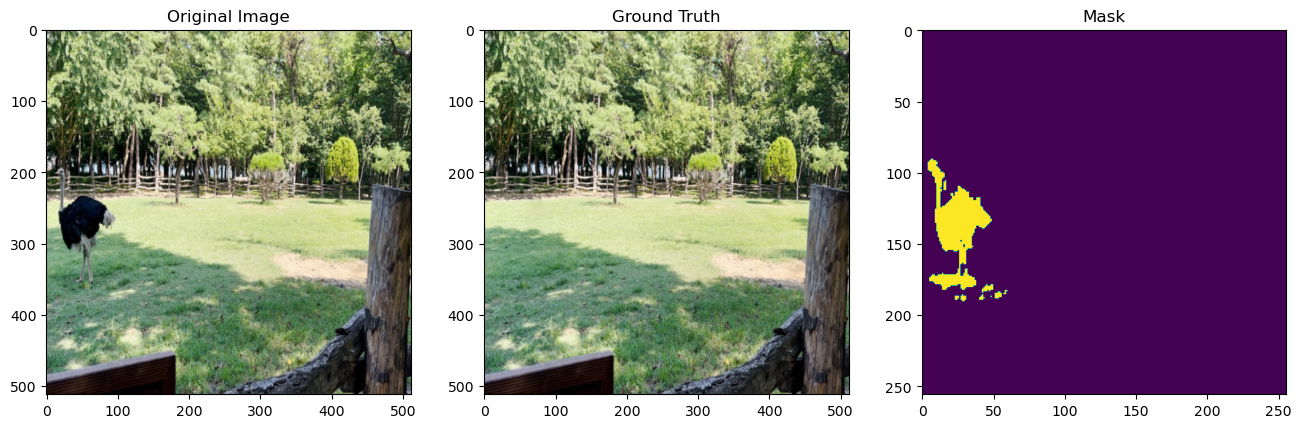

In [36]:
# initialize the dataset
import random
import numpy as np
import matplotlib.pyplot as plt

index = random.sample(range(len(dataset)), 1)
sample = dataset[index[0]]

image = np.array(sample['image']).transpose(1, 2, 0)
gt = np.array(sample['gt']).transpose(1, 2, 0)
mask = np.array(sample['mask']).transpose(1, 2, 0)
# plot the images
plt.figure(figsize=(16, 16))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(gt)
plt.title("Ground Truth")

plt.subplot(1, 3, 3)
plt.imshow(mask / 255.0)
plt.title("Mask")
plt.show()